In [3]:
from manim import *
import math
import jupyter_capture_output
import matplotlib.pyplot as plt

video_scene = " -v WARNING --disable_caching esi_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s esi_Scene"

Jupyter Capture Output v0.0.11


In [21]:
COLOR_TIMS = GRAY
COLOR_DEFLECTION_PLATE = DARK_GRAY
COLOR_ESI_CAPILLARY_EXIT = GRAY

# COLOR_1 = "#02066f"                 # darkroyalblue
COLOR_1 = "#0c06f7"                 # pure blue or smth
COLOR_2 = "#fa2a55"                 # red pink
COLOR_3 = "#a2cffe"                 # dark sky blue

COLOR_PLUS = COLOR_2
COLOR_MINUS = COLOR_1

Output saved by creating file at animations/esi_process.mp4.


Manim Community v0.18.1

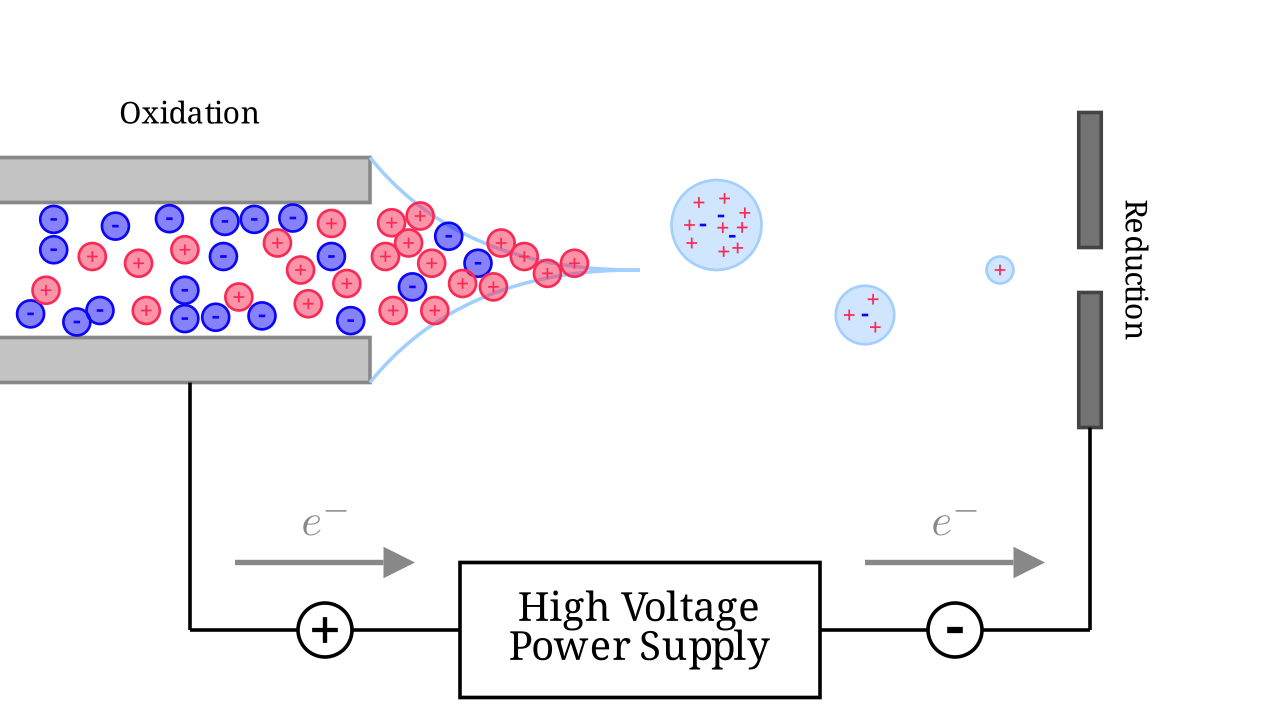

In [23]:
%%capture_video --path "animations/esi_process.mp4"
%%manim -qm --fps 60 $video_scene


class esi_Scene(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        # Reduction
        upper_plate = Rectangle(width = 0.25, height = 1.5, color = COLOR_DEFLECTION_PLATE, fill_color = COLOR_DEFLECTION_PLATE, fill_opacity = 0.75).move_to([5, 2, 0])
        lower_plate = Rectangle(width = 0.25, height = 1.5, color = COLOR_DEFLECTION_PLATE, fill_color = COLOR_DEFLECTION_PLATE, fill_opacity = 0.75).move_to([5, 0, 0])
        plate_descriptor = Text("Reduction", color = BLACK, font_size = 24).next_to([5, 1, 0], RIGHT).rotate(axis = np.array([0, 0, 1]), angle = -PI / 2).shift(0.5*LEFT)
        self.add(upper_plate, lower_plate, plate_descriptor)

        # Capillary
        upper_capillary = Rectangle(height = 0.5, width = 10, color = COLOR_ESI_CAPILLARY_EXIT, fill_opacity = 0.5).move_to([-8, 2, 0])
        lower_capillary = Rectangle(height = 0.5, width = 10, color = COLOR_ESI_CAPILLARY_EXIT, fill_opacity = 0.5).move_to([-8, 0, 0])
        capillary_descriptor = Text("Oxidation", color = BLACK, font_size = 24).next_to(upper_capillary, UP).shift(3*RIGHT+0.125*UP)
        self.add(upper_capillary, lower_capillary, capillary_descriptor)

        upper_cone = CubicBezier(start_anchor = [-8+5, 2+0.25, 0], start_handle = [-8+5+1, 2+0.5-1.5, 0], end_handle = [0-0.5, 1, 0], end_anchor = [0, 1, 0], color = COLOR_3, stroke_opacity = 1)
        lower_cone = CubicBezier(start_anchor = [-8+5, 0-0.25, 0], start_handle = [-8+5+1, 0-0.5+1.5, 0], end_handle = [0-0.5, 1, 0], end_anchor = [0, 1, 0], color = COLOR_3, stroke_opacity = 1)
        self.add(upper_cone, lower_cone)

        # Power Supply
        power_supply = Rectangle(height = 1.5, width = 4, color = BLACK).move_to([0, -3, 0])
        power_supply_descriptor = Text(" High Voltage\nPower Supply", color = BLACK, font_size = 32).move_to([0, -3, 0])
        power_supply_left_cable_1 = Line(start = [-2, -3, 0], end = [-5, -3, 0], color = BLACK)
        power_supply_left_cable_2 = Line(start = [-5, -0.25, 0], end = [-5, -3, 0], color = BLACK)
        power_supply_right_cable_1 = Line(start = [2, -3, 0], end = [5, -3, 0], color = BLACK)
        power_supply_right_cable_2 = Line(start = [5, 0 - 1.5/2, 0], end = [5, -3, 0], color = BLACK)
        self.add(power_supply, power_supply_descriptor, power_supply_left_cable_1, power_supply_left_cable_2, power_supply_right_cable_1, power_supply_right_cable_2)
        power_supply_plus_circle = Circle(radius = 0.3, color = BLACK, fill_color = WHITE, fill_opacity = 1).move_to([-3.5, -3, 0])
        power_supply_plus = Text("+", weight = BOLD, color = BLACK, font_size = 48).move_to([-3.5, -3, 0])
        power_supply_minus_circle = Circle(radius = 0.3, color = BLACK, fill_color = WHITE, fill_opacity = 1).move_to([3.5, -3, 0])
        power_supply_minus = Text("-", weight = BOLD, color = BLACK, font_size = 48).move_to([3.5, -3, 0])
        self.add(power_supply_plus_circle, power_supply_plus, power_supply_minus_circle, power_supply_minus)
        e_left_arrow = Arrow(start = [-5+0.25, -3+0.75, 0], end = [-2-0.25, -3+0.75, 0], color = GRAY)
        e_right_arrow = Arrow(start = [+2+0.25, -3+0.75, 0], end = [5-0.25, -3+0.75, 0], color = GRAY)
        e_left = Tex("$e^-$", color = GRAY, font_size = 48).next_to(e_left_arrow, 0.5*UP)
        e_right = Tex("$e^-$", color = GRAY, font_size = 48).next_to(e_right_arrow, 0.5*UP)
        self.add(e_left_arrow, e_right_arrow, e_left, e_right)

        # supporting coordinate system
        esi_ax = Axes(#x_range = x_range, y_range = y_range, x_length = x_length, y_length = y_length, 
            axis_config = {"stroke_width": 2, "stroke_opacity": 1, "tip_width": 0.125, "tip_height": 0.125, "stroke_color": BLACK, "include_ticks": True}).move_to([-3, 1, 0])
        #self.add(esi_ax)


        # plus charge
        def get_plus(pos):
            plus_circle = Circle(radius = 0.15, color = COLOR_2, fill_color = COLOR_2, fill_opacity = 0.5, stroke_width = 3).move_to(esi_ax.c2p(*pos))
            esi_ax_plus = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(esi_ax.c2p(*pos))
            return VGroup(plus_circle, esi_ax_plus)


        # plus charge
        def get_minus(pos):
            plus_circle = Circle(radius = 0.15, color = COLOR_1, fill_color = COLOR_1, fill_opacity = 0.5, stroke_width = 3).move_to(esi_ax.c2p(*pos))
            esi_ax_plus = Text(r"-", weight = BOLD, color = COLOR_MINUS, font_size = 20).move_to(esi_ax.c2p(*pos))
            return VGroup(plus_circle, esi_ax_plus)

        
        minus_charge_list = [
            [-1, 0.77, 0],
            [-1.5, 0.75, 0],
            [-2.0, -0.7, 0],
            [-2.4, -0.72, 0],
            [-1.88, 0.72, 0],
            [-0.5, 0.2, 0],
            [1.4, 0.1, 0],
            [1.02, 0.5, 0],
            [-2.6, 0.76, 0],
            [-3.3, 0.65, 0],
            [-1.9, 0.2, 0],
            [-2.4, -0.3, 0],
            [-3.8, -0.77, 0],
            [-4.1, 0.75, 0],
            [-4.4, -0.65, 0],
            [-4.1, 0.3, 0],
            [-1.4, -0.68, 0],
            [-0.25, -0.75, 0],
            [0.55, -0.25, 0],
            [-3.5, -0.6, 0]
        ]

        plus_charge_list = [
            [0.2, 0.2, 0],
            [2.65, 0.1, 0],
            [0.5, 0.4, 0],
            [0.28, 0.7, 0],
            [0.65, 0.8, 0],
            [0.84, -0.6, 0],
            [-3.6, 0.2, 0],
            [-2.9, -0.6, 0],
            [2, 0.2, 0],
            [-0.8, -0.5, 0],
            [-2.4, 0.3, 0],
            [-0.5, 0.69, 0],
            [0.3, -0.6, 0],
            [1.6, -0.25, 0],
            [1.7, 0.4, 0],
            [2.3, -0.05, 0],
            [0.8, 0.1, 0],
            [1.2, -0.2, 0],
            [-1.2, 0.4, 0],
            [-1.7, -0.4, 0],
            [-3, 0.1, 0],
            [-4.2, -0.3, 0],
            [-0.3, -0.2, 0],
            [-0.9, 0, 0]
        ]


        for minus_charge_pos in minus_charge_list:
            self.add(get_minus(minus_charge_pos))

        for plus_charge_pos in plus_charge_list:
            self.add(get_plus(plus_charge_pos))


        def get_big_droplet(pos):
            droplet = Circle(radius = 0.5, color = COLOR_3, fill_color = COLOR_3, stroke_opacity = 1, fill_opacity = 0.5, stroke_width = 3).move_to(pos)
            droplet_plus_1 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([0.07, -0.03, 0]))
            droplet_plus_2 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([0.235, -0.255, 0]))
            droplet_plus_3 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([-0.195, 0.25, 0]))
            droplet_plus_4 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([-0.3, 0, 0]))
            droplet_plus_5 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([0.08, -0.295, 0]))
            droplet_plus_6 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([0.285, -0.027, 0]))
            droplet_plus_7 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([0.09, 0.295, 0]))
            droplet_plus_8 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([0.315, 0.135, 0]))
            droplet_plus_9 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([-0.275, -0.2, 0]))
            doplet_minus_1 = Text(r"-", weight = BOLD, color = COLOR_MINUS, font_size = 20).move_to(np.array(pos) + np.array([-0.15, 0, 0]))
            doplet_minus_2 = Text(r"-", weight = BOLD, color = COLOR_MINUS, font_size = 20).move_to(np.array(pos) + np.array([0.175, -0.125, 0]))
            doplet_minus_3 = Text(r"-", weight = BOLD, color = COLOR_MINUS, font_size = 20).move_to(np.array(pos) + np.array([0.05, 0.1, 0]))
            return VGroup(droplet, 
                droplet_plus_1, droplet_plus_2, droplet_plus_3, droplet_plus_4, droplet_plus_5, droplet_plus_6, droplet_plus_7, droplet_plus_8, droplet_plus_9, 
                doplet_minus_1, doplet_minus_2, doplet_minus_3)


        def get_medium_droplet(pos):
            droplet = Circle(radius = 0.325, color = COLOR_3, fill_color = COLOR_3, stroke_opacity = 1, fill_opacity = 0.5, stroke_width = 3).move_to(pos)
            droplet_plus_1 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([0.09, 0.175, 0]))
            droplet_plus_2 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([0.115, -0.135, 0]))
            droplet_plus_3 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(np.array(pos) + np.array([-0.175, 0, 0]))
            doplet_minus_1 = Text(r"-", weight = BOLD, color = COLOR_MINUS, font_size = 20).move_to(np.array(pos))
            return VGroup(droplet, droplet_plus_1, droplet_plus_2, droplet_plus_3, doplet_minus_1)


        def get_small_droplet(pos):
            droplet = Circle(radius = 0.15, color = COLOR_3, fill_color = COLOR_3, stroke_opacity = 1, fill_opacity = 0.5, stroke_width = 3).move_to(pos)
            droplet_plus_1 = Text(r"+", weight = BOLD, color = COLOR_PLUS, font_size = 20).move_to(pos)
            return VGroup(droplet, droplet_plus_1)


        big_droplet_1 = get_big_droplet([0.85, 1.5, 0])
        medium_droplet_1 = get_medium_droplet([2.5, 0.5, 0])
        small_droplet_1 = get_small_droplet([4, 1, 0])
        self.add(big_droplet_1, medium_droplet_1, small_droplet_1)

In [4]:
0.99*0.005 / (0.99*0.005 + 0.99*0.995)

0.005